In [ ]:
# Reading a .las file from scratch, without using the Lasio library.
# Based on https://github.com/leocd91/geodatahandling

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
import numpy as np 

In [17]:
def read_las(filename):         #make a function called read_las which pass a filename of the las we want to parse
  import numpy as np 
  import re
  flag_data="~A"                                      
  flag_curveinfo="~C" 
  flag_other="~"      
  skipchar="#"
  flag_wellinfo="~W"       
  drow_start=0
  wrow_start=0        
  wrow_end=999999
  crow_start=0        
  crow_end=999999       
  type_curve=[]       
  unit_curve=[]

  myfile = open(filename)
  for num, line in enumerate(myfile, 1):
    if flag_data in line:                             
      drow_start=num
    if flag_curveinfo in line:
      crow_start=num 
    if (flag_other in line) and (num > crow_start) and (crow_start is not 0) and (crow_end == 999999):
      crow_end=num 
    if not(skipchar in line) and (crow_start<num<crow_end) and (crow_start > 0) :
      temp=line.split('.')
      tempc=temp[0]
      if (' ' in tempc):
        tempc=tempc.split()
        type_curve.append(tempc[0])
      else:
        type_curve.append(tempc)
      tempu=temp[1]      
      if (' ' in tempu):
        tempu=tempu.split()
        unit_curve.append(tempu[0])
      else:
        unit_curve.append(tempu)
    if flag_wellinfo in line:
      wrow_start=num 
    if (flag_other in line) and (num > wrow_start) and (wrow_start is not 0) and (wrow_end == 999999):
      wrow_end=num 
    if not(skipchar in line) and (wrow_start<num<wrow_end)and ('STRT' in line) and (wrow_start > 0):
      strt_value=float(re.findall("[-+]?(?:(?:\d*\.\d+)|(?:\d+\.?))(?:[Ee][+-]?\d+)?", line)[0]) #need regex to get null value number
    if not(skipchar in line) and (wrow_start<num<wrow_end)and ('STOP' in line) and (wrow_start > 0):
      stop_value=float(re.findall("[-+]?(?:(?:\d*\.\d+)|(?:\d+\.?))(?:[Ee][+-]?\d+)?", line)[0]) #need regex to get null value number
    if not(skipchar in line) and (wrow_start<num<wrow_end)and ('STEP' in line) and (wrow_start > 0):
      step_value=float(re.findall("[-+]?(?:(?:\d*\.\d+)|(?:\d+\.?))(?:[Ee][+-]?\d+)?", line)[0]) #need regex to get null value number
    if not(skipchar in line) and (wrow_start<num<wrow_end)and ('NULL' in line) and (wrow_start > 0):
      null_value=float(re.findall("[-+]?(?:(?:\d*\.\d+)|(?:\d+\.?))(?:[Ee][+-]?\d+)?", line)[0]) #need regex to get null value number
  log_data=np.loadtxt(filename,skiprows=drow_start)
  log_data[log_data==null_value]=np.nan
  myfile.close()
  return log_data,strt_value,stop_value,step_value,null_value,type_curve,unit_curve

In [26]:
# Run the same file used in demo (4771-36-SESE.las)
log_data,strt_value,stop_value,step_value,null_value,type_curve,unit_curve = read_las('input_data//4771-36-SESE.las')

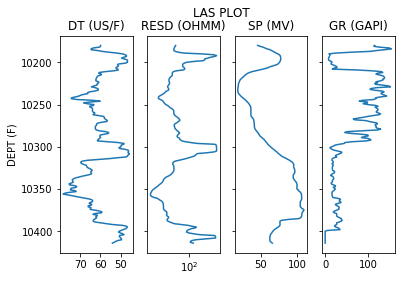

In [27]:
import matplotlib.pyplot as plt 
num_plot=log_data.shape[1]-1
fig, ax = plt.subplots(1, num_plot, sharey=True)            
                                                            
fig.suptitle('LAS PLOT')
for i in range(0,num_plot):
  ax[i].plot(log_data[:,i+1],log_data[:,0])
  ax[i].set_title(type_curve[i+1]+" ("+unit_curve[i+1]+")")
ax[-1].invert_yaxis()                                       
ax[0].set(ylabel=type_curve[0]+" ("+unit_curve[0]+")")
ax[1].set_xscale('log')                                     
ax[0].invert_xaxis()                                        

In [29]:
# Now try with some las files from Volve
log_data,strt_value,stop_value,step_value,null_value,type_curve,unit_curve = read_las('input_data//volve_well_logs//WLC_PETROPHYSICAL_COMPOSITE - well 15_9-F-7.las')

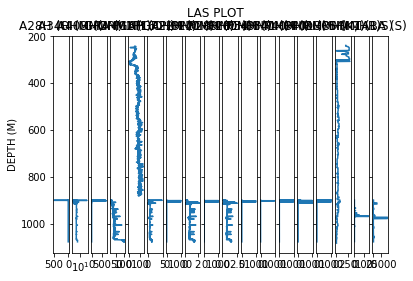

In [30]:
num_plot=log_data.shape[1]-1
fig, ax = plt.subplots(1, num_plot, sharey=True)            
                                                            
fig.suptitle('LAS PLOT')
for i in range(0,num_plot):
  ax[i].plot(log_data[:,i+1],log_data[:,0])
  ax[i].set_title(type_curve[i+1]+" ("+unit_curve[i+1]+")")
ax[-1].invert_yaxis()                                       
ax[0].set(ylabel=type_curve[0]+" ("+unit_curve[0]+")")
ax[1].set_xscale('log')                                     
ax[0].invert_xaxis()       

In [31]:
log_data,strt_value,stop_value,step_value,null_value,type_curve,unit_curve = read_las('input_data//volve_well_logs//159-19A_LFP.las')

# Produces ValueError: Wrong number of columns at line 212
# Because the data is wrapped!

ValueError: Wrong number of columns at line 212

In [33]:
log_data,strt_value,stop_value,step_value,null_value,type_curve,unit_curve = read_las('input_data//composite//STAT1990__30-1__15-9-19_SR__COMPOSITE__1.las')

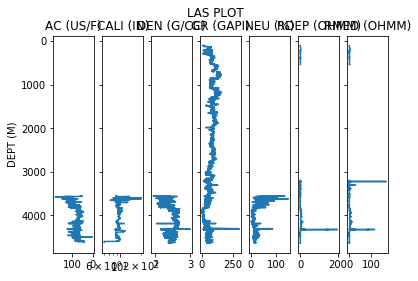

In [34]:
num_plot=log_data.shape[1]-1
fig, ax = plt.subplots(1, num_plot, sharey=True)            
                                                            
fig.suptitle('LAS PLOT')
for i in range(0,num_plot):
  ax[i].plot(log_data[:,i+1],log_data[:,0])
  ax[i].set_title(type_curve[i+1]+" ("+unit_curve[i+1]+")")
ax[-1].invert_yaxis()                                       
ax[0].set(ylabel=type_curve[0]+" ("+unit_curve[0]+")")
ax[1].set_xscale('log')                                     
ax[0].invert_xaxis()     